# __SKY DIVING MODEL__

In [1]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint

In [2]:
sns.set_theme(
    context='notebook',
    style='whitegrid',
    palette='bright')

### __Differantial Equation of Free Falling with Air Resistance__:

$$ F_N - F_{\text{air}} = ma $$

$$ mg - \frac{1}{2} p A C_D v^2 = ma$$

$$ mg - \frac{1}{2} p A C_D v^2 = m \frac{\Delta v}{\Delta t}$$

$$ g - \frac{p A C_D v^2}{2m}  =  \frac{\Delta v}{\Delta t}$$

$$ \frac{\Delta v}{\Delta t}  = g - \frac{p A C_D v^2}{2m} $$

### __Terminal Velocity Condition:__

$$ F_{\text{air}} = F_N $$

$$ mg = \frac{1}{2} p A C_D v^2 $$



### __Defining Terminal-Velocity Function__:

In [3]:
def calculate_terminal_velocity(m, g, C_D, p, A) -> float:
    terminal_velocity: float = sqrt(
        (2 * m * g) / (p * A * C_D)
    )
    return terminal_velocity

### __Defining Model Function of Differantial Problem:__

In [4]:
def model(v, t, g, A, C_D, m, p):
    dvdt = g - ((p * A * C_D * v**2) / (2 * m))
    return dvdt

### __Defining Variables and Constans:__

In [5]:
from dataclasses import dataclass, field
from numpy import ndarray

In [6]:
@dataclass
class Elements:
    """
    Constants & Variables of Differantial Equation 
    """
    m: float # mass (kg)
    p: float # Density of air (kg/m3)
    A: float # Area of the Object Exposed to Airflow (m2)
    C_D: float # Drag Coefficient
    v0: float # velocity of object (m/s)
    g: float  # gravity (m/s2)
    t: ndarray # time (s)
        


__Variables and Constants:__

In [7]:
test_elements: Elements = Elements(
    m=80, 
    p=1.225, 
    A=0.75,
    C_D=0.47, 
    v0=0, 
    g=9.81,
    t = np.linspace(0,25,500)
)

### __Terminal Velocity of Variables:__

In [8]:
terminal_velocity: float = calculate_terminal_velocity(m=test_elements.m,
                            g=test_elements.g,
                            C_D=test_elements.C_D,
                            p=test_elements.p,
                            A=test_elements.A)

### __Model Solution:__

In [9]:
solution: ndarray = odeint(model, 
                  y0=test_elements.v0, 
                  t=test_elements.t, 
                  args=(test_elements.g, 
                        test_elements.A, 
                        test_elements.C_D, 
                        test_elements.m, 
                        test_elements.p,))

### Visualization

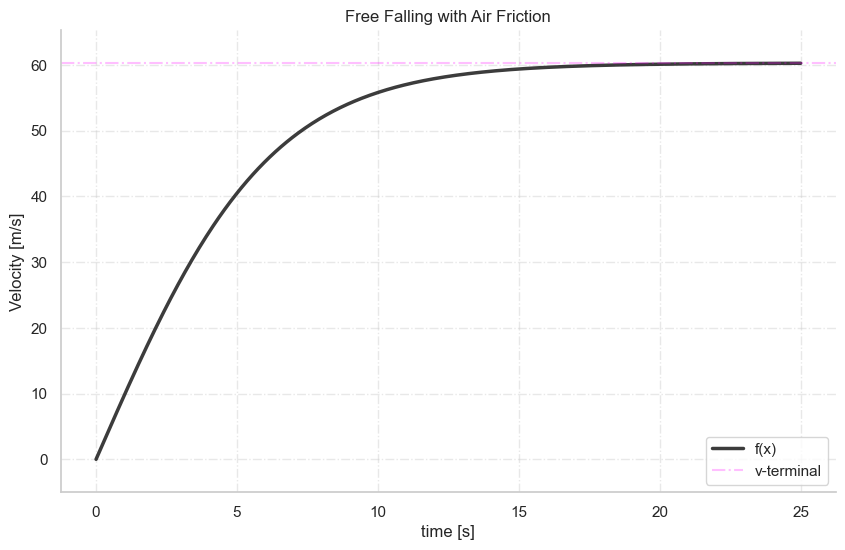

In [10]:
figure, axes = plt.subplots(figsize=(10,6))

axes.plot(test_elements.t,
         solution,
         lw=2.5,
         label="f(x)",
         color="k",
         alpha=0.85)

axes.axhline(terminal_velocity,
            alpha=0.25,
            ls="-.",
            label="v-terminal",
            color="#FF00FF")

axes.grid(True, alpha=0.45, ls="-.")
axes.legend(loc="best")
axes.set_title("Free Falling with Air Friction")
axes.set_xlabel("time [s]")
axes.set_ylabel("Velocity [m/s]")
axes.set_ylim(-5, terminal_velocity + 5)
sns.despine()
plt.show()